In [5]:
import polars as pl
from plotnine import ggplot, aes, labs, facet_wrap, geom_point

In [6]:
reservaeg = pl.duration(hours=16, minutes=45)  # reservaja algus kell 16:45
esimene_päev = pl.datetime(2023, 7, 17).dt.ordinal_day()  # teenistuse esimene päev 17.07.2023

In [7]:
df = pl.read_csv('andmed/spioonid.csv', try_parse_dates=True).with_columns(
    (pl.col('kuupäev') - pl.col('kuupäev').dt.strftime('%Y-%m-%d').str.strptime(pl.Datetime)).alias('tund'),
    (pl.col('kuupäev').dt.ordinal_day() - esimene_päev).alias('aeg')).with_columns(
    pl.when(pl.col('tund') >= reservaeg)
    .then(pl.lit('Vaba- ja reservaeg'))
    .otherwise(pl.lit('Muu aeg'))
    .alias('tegevusaeg')
)

df.head()

kuupäev,tund,aeg,tegevusaeg
datetime[μs],duration[μs],u32,str
2023-07-23 14:11:00,14h 11m,6,"""Muu aeg"""
2023-07-23 17:30:00,17h 30m,6,"""Vaba- ja reser…"
2023-07-23 18:32:00,18h 32m,6,"""Vaba- ja reser…"
2023-07-23 21:34:00,21h 34m,6,"""Vaba- ja reser…"
2023-07-23 22:05:00,22h 5m,6,"""Vaba- ja reser…"


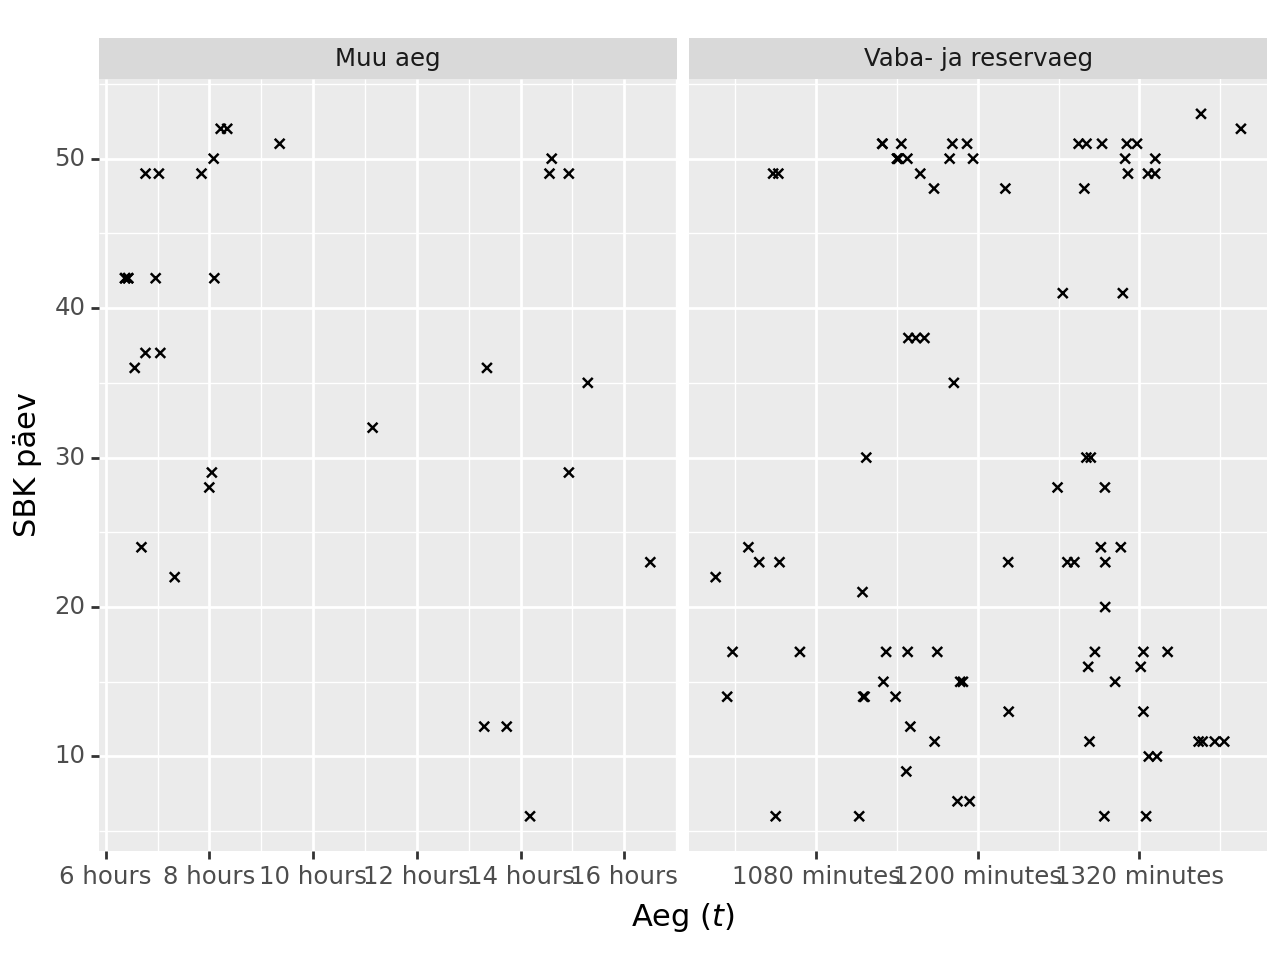

<Figure Size: (640 x 480)>

In [8]:
g = (ggplot(df) +
     facet_wrap('tegevusaeg', scales='free_x') +
     aes('tund', 'aeg') +
     labs(x='Aeg $(t)$', y='SBK päev') +
     geom_point(shape='x'))

# g.save('joonised/punktiprotsessid.png', dpi=100)
g